### Starting with Linear Regression in sckit-learn, then continue with Random Forest Regressor and Neural Network ML model.

(Features) **X-variables**: region, date, units sold, production data, climate data.

(Target) **y-variable:** avocado price 

### From the rubric (in progress)


**What is Linear Regression model?**

Linear Regression in ML is used for understanding the relationship beteween input and output numerical variables. ML, specifically the field of predictive modeling is primarily concerned with minimizing the error of the model or making the most accurate predictions possible, at the expense of explainability (source: https://machinelearningmastery.com/linear-regression-for-machine-learning/ )

**How the model works?**

Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).
This model, it is limited by the fact that it can only make good predictions if there is a linear relationship between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression

**Why this specific model?**

We have continious y-variable.
Linear Regression model with Scikit-learn is a good starting point for exploring how dataset fit the model.

**What is the model accuracy?**

R2:0.70

mean_squared_error:0.04

**If there are statistic involved, what stats are being included in analysis and why?**
- outliers (see tableau and EDA)
- descriptive statistics (EDA)
- coleration (below)

**If no statistics are involved, what would you include if you had more time?**

### DATA PREPROCESING  (in progress)

Dealing with dates in ML and preprocesing the data
- date is imported as object/string, convert datatype
- exctract only month (With exctracting the month we wanted to check seasonality in the dataset. Assumption -> in each month in a given year we see similar patterns.

- encoding strings
- calculating ratio sold vs produced = divide two colums together.

- check column: type_conventional -> appears twice. combine.

- sum units sold and use this instead total voulume. 

### EDA and STATISTICS (in progress)

- outliers
- trends
- descriptive statistics
- collerations
- variance and bias (https://www.bmc.com/blogs/bias-variance-machine-learning/)


### Importing data from the database (in progress)

In [1]:
# #Code here
# #Check the code sqlite and sqAlchemy
# from configparser import ConfigParser

# def config(filename='avocados.ini', section='postgresql'):
#     parser = ConfigParser()
#     parser.read(filename)
    
#     db={}
    
#     if parser.has_section(section):
#         params =praser.items(section)
#         for param in params:
#             db[param[0]] = param[1]
            
#     else:
#         raise Exception('Section {0} not found in the {1} file'.format(section, filename))
    
#     return db

# config()

## Linear Regression with sckit-learn

In [2]:
# Import dependencies.
import pandas as pd
import numpy
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the avocado.csv dataset.
avocado_df = pd.read_csv(Path('./Data/CAonly.csv'))
# Make a copy
avocado_df = avocado_df.copy()
avocado_df.head()

,year_month,date,geography,type,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,...,status,prod_total_volume,ratio price_total_volume vs prod_total_volume,ratio CA sold vs prod,california,prod,chile,mexico,peru,columbia
0,1/1/2018,1/14/2018,California,conventional,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,...,actual,52758905,0.112342,0.14,830821,"(2018-01-01,1/14/2018,actual,52758905,830821,4...",449003,51479081,0,0
1,1/1/2018,1/14/2018,California,organic,1.61,216681.04,52253.40,95353.95,0.00,69073.69,...,actual,52758905,0.004107,3.83,830821,"(2018-01-01,1/14/2018,actual,52758905,830821,4...",449003,51479081,0,0
2,1/1/2018,1/21/2018,California,conventional,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,...,actual,54698266,0.120845,0.44,2913663,"(2018-01-01,1/21/2018,actual,54698266,2913663,...",445127,51339476,0,0
3,1/1/2018,1/21/2018,California,organic,1.69,181974.98,34411.37,64513.67,0.00,83049.94,...,actual,54698266,0.003327,16.01,2913663,"(2018-01-01,1/21/2018,actual,54698266,2913663,...",445127,51339476,0,0
4,1/1/2018,1/28/2018,California,conventional,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,...,actual,45299201,0.135412,0.44,2698356,"(2018-01-01,1/28/2018,actual,45299201,2698356,...",95491,42505354,0,0


## Visuals for EDA

- prices organic vs conventional (average)
- total units sold in by city


- total production in selected countries
- price trend over time
- corelation between price and production

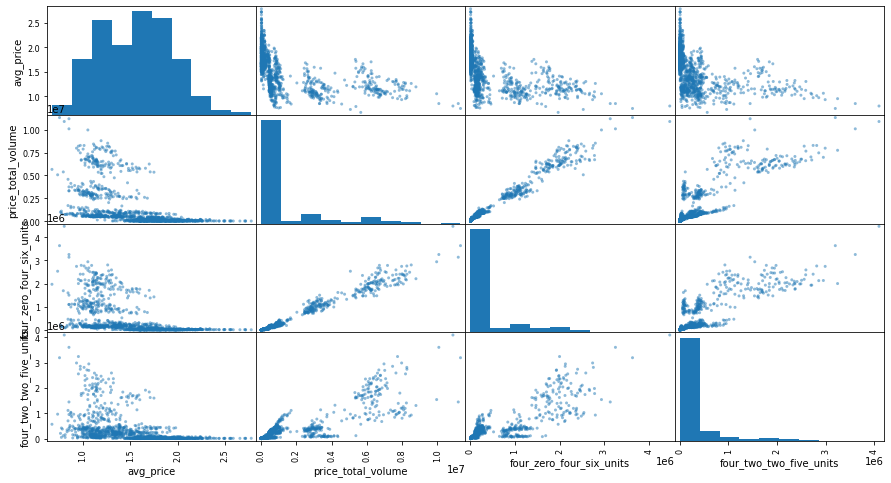

In [3]:
#EDA with scatter matrix
pd.plotting.scatter_matrix(avocado_df.iloc[:,4:8], figsize=(15,8));

In [4]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(avocado_df, x_vars=['type'], y_vars='avg_price', height=7, aspect=0.7)

In [5]:
# # #corelation between price and production in seleted city?
# plt.bar(avocado_df.avg_price, avocado_df['california'])
# plt.xlabel('avg_price')
# plt.ylabel('ratio CA sold vs prod')
# plt.show()

In [6]:
# # price trend over time
# plt.scatter(avocado_df["date"], avocado_df['avg_price'])
# plt.xlabel('Month')
# plt.ylabel('avg_price')
# plt.show()

In [7]:
avocado_df.head()

,year_month,date,geography,type,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,...,status,prod_total_volume,ratio price_total_volume vs prod_total_volume,ratio CA sold vs prod,california,prod,chile,mexico,peru,columbia
0,1/1/2018,1/14/2018,California,conventional,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,...,actual,52758905,0.112342,0.14,830821,"(2018-01-01,1/14/2018,actual,52758905,830821,4...",449003,51479081,0,0
1,1/1/2018,1/14/2018,California,organic,1.61,216681.04,52253.40,95353.95,0.00,69073.69,...,actual,52758905,0.004107,3.83,830821,"(2018-01-01,1/14/2018,actual,52758905,830821,4...",449003,51479081,0,0
2,1/1/2018,1/21/2018,California,conventional,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,...,actual,54698266,0.120845,0.44,2913663,"(2018-01-01,1/21/2018,actual,54698266,2913663,...",445127,51339476,0,0
3,1/1/2018,1/21/2018,California,organic,1.69,181974.98,34411.37,64513.67,0.00,83049.94,...,actual,54698266,0.003327,16.01,2913663,"(2018-01-01,1/21/2018,actual,54698266,2913663,...",445127,51339476,0,0
4,1/1/2018,1/28/2018,California,conventional,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,...,actual,45299201,0.135412,0.44,2698356,"(2018-01-01,1/28/2018,actual,45299201,2698356,...",95491,42505354,0,0


In [8]:
# Drop the non-beneficial columns.
avocado_df.drop(columns=["year_month", "prod", "status"], inplace=True)
avocado_df.head()

,date,geography,type,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,prod_total_volume,ratio price_total_volume vs prod_total_volume,ratio CA sold vs prod,california,chile,mexico,peru,columbia
0,1/14/2018,California,conventional,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,1226559.09,25390.97,68898.86,52758905,0.112342,0.14,830821,449003,51479081,0,0
1,1/14/2018,California,organic,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.00,52758905,0.004107,3.83,830821,449003,51479081,0,0
2,1/21/2018,California,conventional,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,1431898.88,24801.59,61880.70,54698266,0.120845,0.44,2913663,445127,51339476,0,0
3,1/21/2018,California,organic,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.00,54698266,0.003327,16.01,2913663,445127,51339476,0,0
4,1/28/2018,California,conventional,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,1480527.70,24545.94,67748.62,45299201,0.135412,0.44,2698356,95491,42505354,0,0


In [9]:
# Check datatypes
avocado_df.dtypes

date                                              object
geography                                         object
type                                              object
avg_price                                        float64
price_total_volume                               float64
four_zero_four_six_units                         float64
four_two_two_five_units                          float64
four_seven_seven_zero_units                      float64
total_bags                                       float64
s_bags                                           float64
l_bags                                           float64
xl_bags                                          float64
prod_total_volume                                  int64
ratio price_total_volume vs prod_total_volume    float64
ratio CA sold vs prod                            float64
california                                         int64
chile                                              int64
mexico                         

In [10]:
# Convert date object to date and check datatype
import datetime
avocado_df.date = avocado_df.date.apply(pd.to_datetime)
print(avocado_df.date.dtypes)

datetime64[ns]


In [11]:
# # Exctract the week and try this way too
# avocado_df['week'] = avocado_df.date.dt.month
# avocado_df.head()

In [12]:
# Exctract the month
avocado_df['month'] = avocado_df.date.dt.month
avocado_df.head()

,date,geography,type,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,...,xl_bags,prod_total_volume,ratio price_total_volume vs prod_total_volume,ratio CA sold vs prod,california,chile,mexico,peru,columbia,month
0,2018-01-14,California,conventional,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,1226559.09,...,68898.86,52758905,0.112342,0.14,830821,449003,51479081,0,0,1
1,2018-01-14,California,organic,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,...,0.00,52758905,0.004107,3.83,830821,449003,51479081,0,0,1
2,2018-01-21,California,conventional,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,1431898.88,...,61880.70,54698266,0.120845,0.44,2913663,445127,51339476,0,0,1
3,2018-01-21,California,organic,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,...,0.00,54698266,0.003327,16.01,2913663,445127,51339476,0,0,1
4,2018-01-28,California,conventional,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,1480527.70,...,67748.62,45299201,0.135412,0.44,2698356,95491,42505354,0,0,1


In [13]:
# Check the datatypes for month
print(avocado_df.month.dtypes)

int64


In [14]:
#Check the months
#avocado_df.month.value_counts()

In [15]:
# Use get_dummies() to create variables for text features.
avocado_cat_encoded = pd.get_dummies(avocado_df,  columns=["geography", "type"])
avocado_cat_encoded.head()

,date,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,...,columbia,month,geography_California,geography_Los Angeles,geography_Sacramento,geography_San Diego,geography_San Francisco,type_conventional,type_conventional,type_organic
0,2018-01-14,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,1226559.09,25390.97,68898.86,...,0,1,1,0,0,0,0,1,0,0
1,2018-01-14,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.00,...,0,1,1,0,0,0,0,0,0,1
2,2018-01-21,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,1431898.88,24801.59,61880.70,...,0,1,1,0,0,0,0,1,0,0
3,2018-01-21,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.00,...,0,1,1,0,0,0,0,0,0,1
4,2018-01-28,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,1480527.70,24545.94,67748.62,...,0,1,1,0,0,0,0,1,0,0


In [16]:
#List the columns
avocado_cat_encoded.columns.tolist()

['date',
 'avg_price',
 'price_total_volume',
 'four_zero_four_six_units',
 'four_two_two_five_units',
 'four_seven_seven_zero_units',
 'total_bags',
 's_bags',
 'l_bags',
 'xl_bags',
 'prod_total_volume',
 'ratio price_total_volume vs prod_total_volume',
 'ratio CA sold vs prod',
 'california',
 'chile',
 'mexico',
 'peru',
 'columbia',
 'month',
 'geography_California',
 'geography_Los Angeles',
 'geography_Sacramento',
 'geography_San Diego',
 'geography_San Francisco',
 'type_conventional',
 'type_conventional ',
 'type_organic']

In [17]:
# Drop the non-beneficial columns - drop "prod_total_volume" after the ratio calculations
avocado_cat_encoded.drop(columns=["date", "prod_total_volume"], inplace=True)
avocado_cat_encoded.head()

,avg_price,price_total_volume,four_zero_four_six_units,four_two_two_five_units,four_seven_seven_zero_units,total_bags,s_bags,l_bags,xl_bags,ratio price_total_volume vs prod_total_volume,...,columbia,month,geography_California,geography_Los Angeles,geography_Sacramento,geography_San Diego,geography_San Francisco,type_conventional,type_conventional,type_organic
0,1.27,5927016.73,2098762.55,2356359.93,151045.33,1320848.92,1226559.09,25390.97,68898.86,0.112342,...,0,1,1,0,0,0,0,1,0,0
1,1.61,216681.04,52253.40,95353.95,0.00,69073.69,69054.51,19.18,0.00,0.004107,...,0,1,1,0,0,0,0,0,0,1
2,1.12,6610010.64,2378177.09,2590301.70,122950.68,1518581.17,1431898.88,24801.59,61880.70,0.120845,...,0,1,1,0,0,0,0,1,0,0
3,1.69,181974.98,34411.37,64513.67,0.00,83049.94,83022.84,27.10,0.00,0.003327,...,0,1,1,0,0,0,0,0,0,1
4,1.16,6134040.58,2254631.80,2185495.65,121090.87,1572822.26,1480527.70,24545.94,67748.62,0.135412,...,0,1,1,0,0,0,0,1,0,0


In [18]:
# Define X values.
features = ['month', 'ratio CA sold vs prod','geography_California', 'geography_Los Angeles', 'geography_Sacramento', 'geography_San Diego', 'geography_San Francisco', 'type_conventional', 'type_conventional ', 'type_organic']
X = avocado_cat_encoded[features]

In [19]:
# Define y values.
y = avocado_df.avg_price

In [20]:
# Split the to training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [21]:
# Fit the model.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the model.
y_pred = model.predict(X_test)

In [23]:
# print the coefficients
list(zip(features, model.coef_))
print(model.coef_)
print(model.intercept_)

[ 1.15138440e-02  9.81966492e-05 -2.45408048e-02 -1.12294797e-01
 -8.84052911e-03 -1.25243819e-02  1.58200513e-01 -2.56913098e-01
 -1.12773429e-01  3.69686527e-01]
1.3855002510128855


In [24]:
# Print the scores
print("R2 score : %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

R2 score : 0.70
Mean squared error: 0.04


In [25]:
#pd.Series(y_pred)

In [26]:
#pd.Series(y_pred).plot()

### Observations (in progress)

Skipping type of avocado (organic/conventional) affect the result - lower score.
Production and ration slightly affect the result.


### Interpretation of the results (in progress)

"R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). Interpretation: with the data used we can predict the prices.

Mean square error (MSE) is the average of the square of the errors. The larger the number the larger the error.

Source: https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
Similarly, there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models

good resource: https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

Our dataset can be:
R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize.

Overfit means the model is subject to outliers and noise.

Underfit means the model could look at other inputs (i.e., additional features).

### Random Forest Regressor (ensamble) - (in progress)

In [27]:
# Initial imports.
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [28]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators = 10)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=10, random_state=0)

In [29]:
# Calculated the balanced accuracy score
y_pred = regr.predict(X_test)